# 0.04 Examine Surrogate Data
#### 09/12/2022, JX
> Please show me data

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [2]:
import pandas as pd

In [3]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_amp_envs200sr_MF_IAAFT_spl.pickle'
ae_df = pd.read_pickle(SAVE_PATH)

In [4]:
SAVE_PATH

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/starling_b1555_amp_envs200sr_MF_IAAFT_spl.pickle')

In [5]:
ae_df = ae_df.reset_index()

In [6]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,confusing,is_call,amp_env,spl_env,h_expo_ae,MF_range_ae,h_expo_spl,MF_range_spl,mf_iaaft_range_ae,mf_iaaft_range_spl
0,0,508500,566065,24408000,27171120,"[28.88509981238539, 65.14898407709249, 103.180...",9.609107,143.211264,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[2.4892911824281327e-05, 0.002640440361574292,...","[0.012887999192663964, 1.6298831714527595, 3.0...","[1.210268876562112, 1.0847868581968103, 0.9997...",0.417653,"[1.0488658170321583, 1.0192658050285757, 0.997...",0.137107,"[0.32529287768164084, 0.28577091554089273, 0.3...","[0.08512163665434325, 0.08596406153368308, 0.1..."
1,1,641180,694125,30776640,33318000,"[48.20694858466058, 83.76981436987464, 108.852...",5.388905,156.745806,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.805372893519234e-06, 0.0016227918677031994,...","[0.00406788556508693, 1.1053593978847633, 2.39...","[1.206747469037927, 1.0668692741274823, 0.9747...",0.461689,"[1.0845706146074268, 1.0475678318350459, 1.022...",0.152306,"[0.3052440883392816, 0.377364154256425, 0.3982...","[0.09521406551035116, 0.09391900718340407, 0.0..."
2,2,868940,921030,41709120,44209440,"[2.3001409701376363, 15.027985352733767, 30.17...",8.135380,156.958417,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[9.765496361069381e-05, 0.007925855927169323, ...","[0.025815673495165517, 3.3906952118208697, 5.3...","[1.2857270505789482, 1.1416211034999122, 1.035...",0.537401,"[1.054714273517234, 1.0216348378749254, 0.9976...",0.155954,"[0.4549324956708789, 0.4083176267976, 0.495630...","[0.1091284283096905, 0.10212253759305578, 0.09..."
3,3,1043035,1093720,50065680,52498560,"[2.9249842953419494, 3.1541257656248125, 14.16...",8.135380,144.054406,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.769828931079246e-05, 0.015915358439087868, ...","[0.020930336806865055, 5.403901915623869, 11.0...","[1.317296971969834, 1.1366829235572742, 1.0264...",0.522708,"[1.1249544237114795, 1.0707444454679387, 1.032...",0.227368,"[0.39738275084129293, 0.38212592723227556, 0.3...","[0.11430570369910509, 0.15705306054070478, 0.1..."
4,4,1423905,1474480,68347440,70775040,"[3.937345912388517, 3.469701876813218, 2.86553...",4.015413,140.816750,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[5.337237780622672e-06, 0.0012986172223463655,...","[0.00395726763677555, 0.9592529687682605, 1.81...","[1.1679092266897195, 1.0605409985158545, 0.984...",0.388723,"[0.990100912082668, 0.9594052503013833, 0.9354...",0.152659,"[0.3080191641039992, 0.2847893575065573, 0.273...","[0.09297751973838841, 0.09634551123919322, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,89,1591530,1602065,76393440,76899120,"[4.643018462812651, 2.923919620954338, 13.5363...",2.043606,114.653102,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[3.023368481080979e-05, 0.0012741615064442158,...","[0.017286074782681404, 1.0340200170418643, 2.0...","[1.2917844908328622, 1.1501793367891089, 1.021...",0.659497,"[1.1744464301571218, 1.1276826778296476, 1.096...",0.184049,"[0.6184457477429754, 0.5857270827153475, 0.557...","[0.1397161247886214, 0.14223847345304574, 0.14..."
1037,123,1605580,1610770,77067840,77316960,"[33.25759392172391, 29.86369699500519, 6.09811...",2.043606,238.422834,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,False,False,"[7.692791405133903e-05, 0.018301259726285934, ...","[0.019650267776198868, 4.695249442450509, 9.37...","[1.7012421954121975, 1.3053615144730153, 1.059...",1.050222,"[1.3893312733498826, 1.3055277312161337, 1.250...",0.308968,"[0.7864249106017592, 0.8868359581920928, 0.740...","[0.2179360092495497, 0.28271072654484075, 0.33..."
1038,136,411070,415280,19731360,19933440,"[5.175037749402548, 70.80952142186685, 57.2026...",2.616865,159.078826,False,/mnt/sp

## Parse t-statistics for amp

In [16]:
import scipy.stats as stats
import numpy as np

In [17]:
ts = []
p = []
for MF_range, mf_iaaft_range in zip(ae_df['MF_range_ae'].values, ae_df['mf_iaaft_range_ae']):
    test = stats.ttest_1samp(mf_iaaft_range, MF_range)
    ts.append(test[0])
    p.append(test[1])
    
ae_df['ts_ae'] = ts
ae_df['p_ae'] = p

In [18]:
import statsmodels.stats.multitest

In [19]:
bonferroni = statsmodels.stats.multitest.multipletests(ae_df['p_ae'].values, alpha = 0.05, method = 'bonferroni')
ae_df['sig_ae'] = bonferroni[0]
ae_df['bonf_p_ae'] = bonferroni[1]

In [20]:
ae_df.columns

Index(['index', 'start_ms', 'end_ms', 'start_sample', 'end_sample', 'p_step',
       'rms_p', 'peak_p', 'bout_check', 'file', 'len_ms', 'syl_in', 'n_syl',
       'peaks_p', 'n_peaks', 'l_p_ratio', 'waveform', 'valid_waveform',
       'valid', 'spectrogram', 'confusing', 'is_call', 'amp_env', 'spl_env',
       'h_expo_ae', 'MF_range_ae', 'h_expo_spl', 'MF_range_spl',
       'mf_iaaft_range_ae', 'mf_iaaft_range_spl', 'ts_ae', 'p_ae', 'sig_ae',
       'bonf_p_ae'],
      dtype='object')

## Parse t-statistic for spl

In [25]:
ts = []
p = []
for MF_range, mf_iaaft_range in zip(ae_df['MF_range_spl'].values, ae_df['mf_iaaft_range_spl']):
    test = stats.ttest_1samp(mf_iaaft_range, MF_range)
    ts.append(test[0])
    p.append(test[1])
    
ae_df['ts_spl'] = ts
ae_df['p_spl'] = p

In [27]:
bonferroni = statsmodels.stats.multitest.multipletests(ae_df['p_spl'].values, alpha = 0.05, method = 'bonferroni')
ae_df['sig_spl'] = bonferroni[0]
ae_df['bonf_p_spl'] = bonferroni[1]

## t-statistic inquiries ae

In [22]:
### Out of 10499 bouts, how many are significantly multifractal?
np.unique(ae_df['sig_ae'].values, return_counts = True)

(array([False,  True]), array([   3, 1038]))

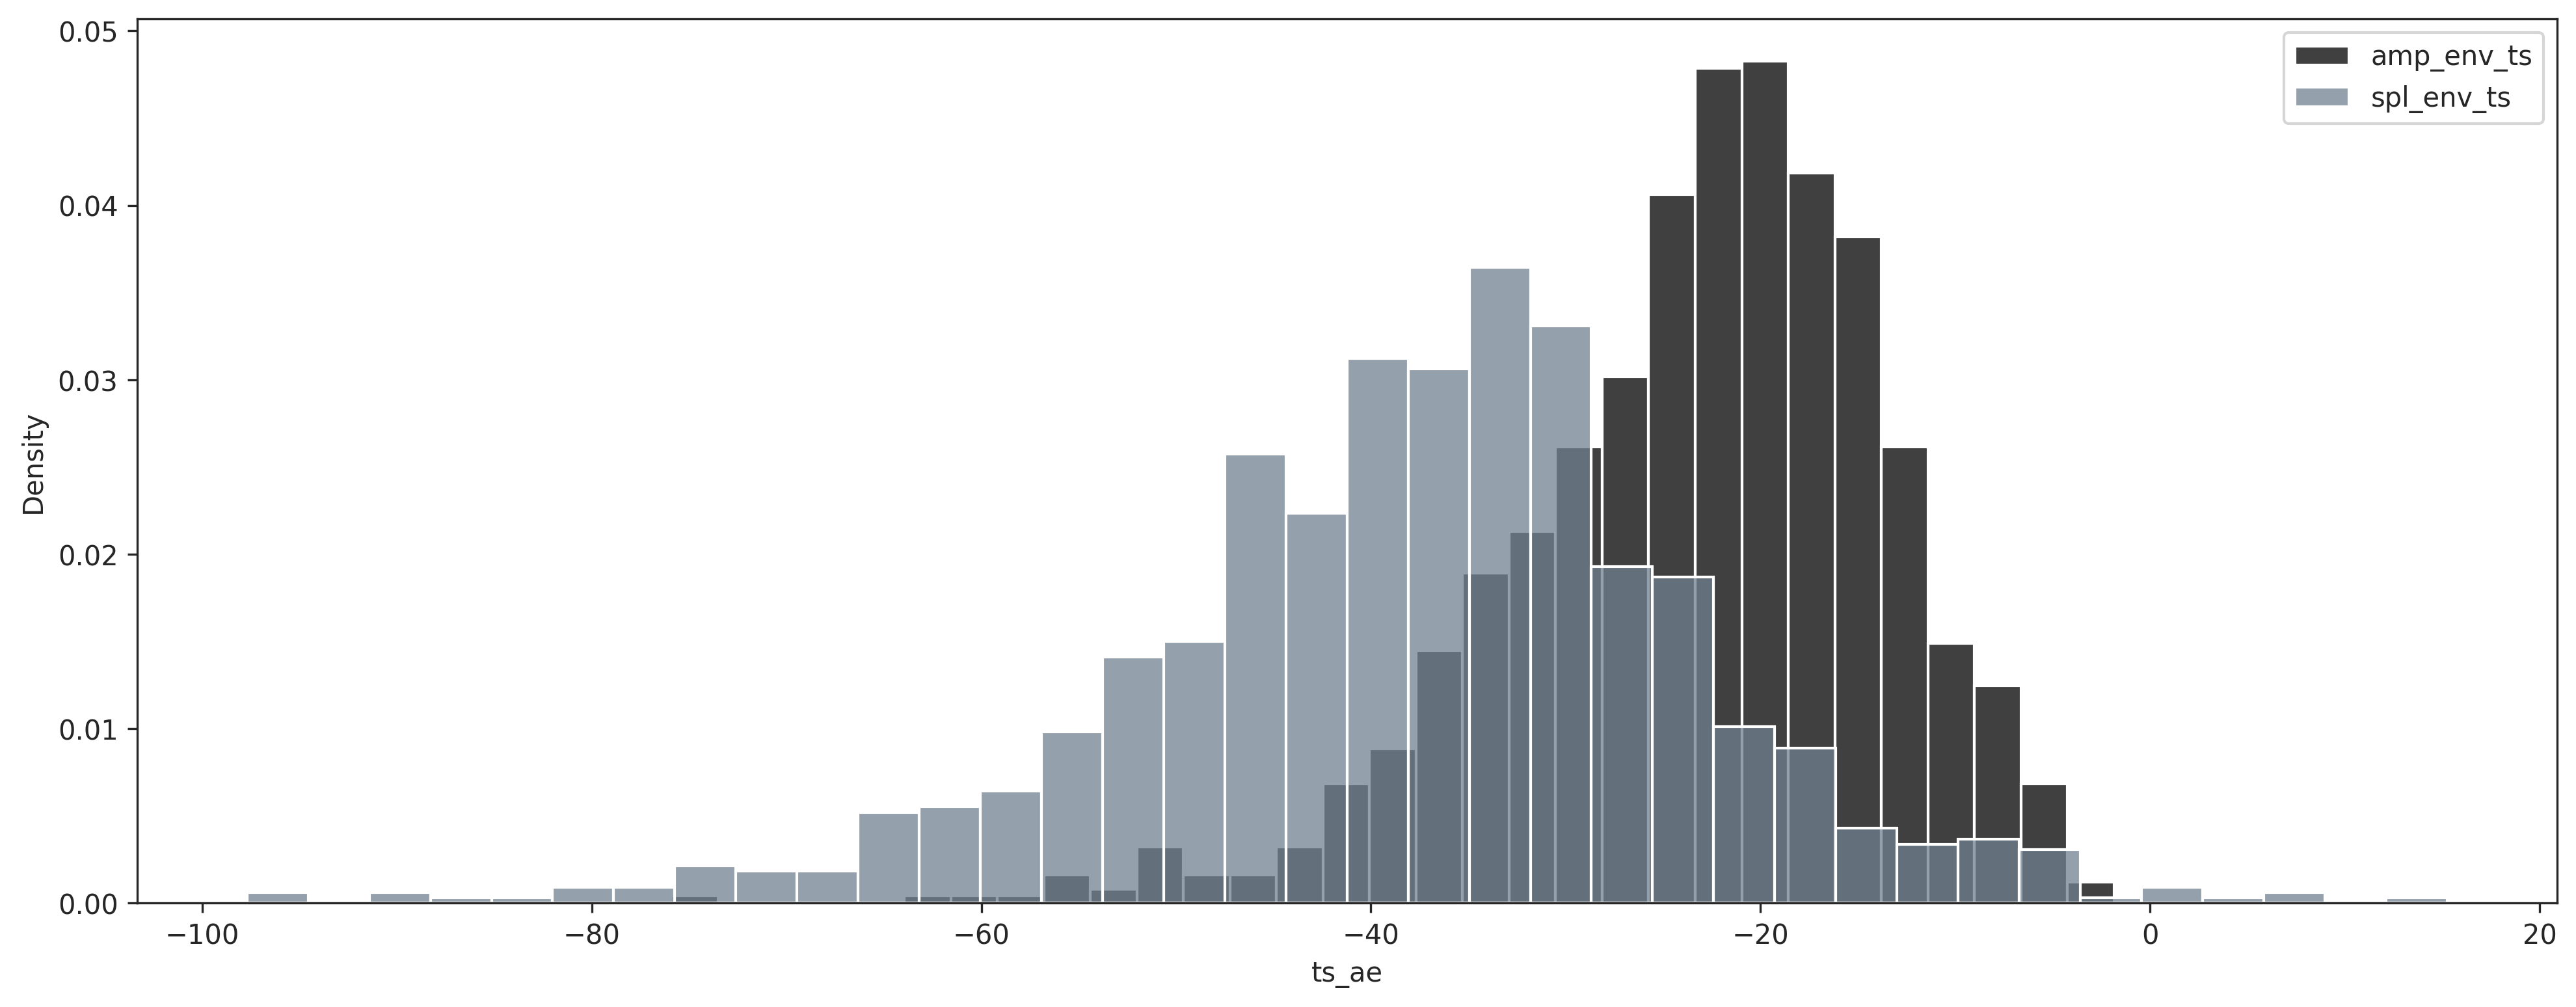

In [76]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

#plt.xlim([-100, 0])

sns.histplot(data = ae_df, x = 'ts_ae', stat = 'density', color = 'black')
sns.histplot(data = ae_df, x = 'ts_spl', stat = 'density', color = 'slategray')

plt.legend(labels=['amp_env_ts', 'spl_env_ts'])

## Are the two ts correlated?

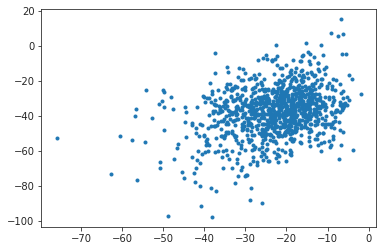

In [84]:
plt.plot(ae_df.ts_ae, ae_df.ts_spl, '.')

In [103]:
import statsmodels.formula.api as smf

In [107]:
mod = smf.glm(formula = 'ts_ae ~ ts_spl', data = ae_df)

In [108]:
mdf = mod.fit()

In [109]:
print(mdf.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  ts_ae   No. Observations:                 1041
Model:                            GLM   Df Residuals:                     1039
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          82.718
Method:                          IRLS   Log-Likelihood:                -3774.3
Date:                Fri, 21 Oct 2022   Deviance:                       85944.
Time:                        09:42:07   Pearson chi2:                 8.59e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1063
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.0886      0.793    -19.016      0.0

In [110]:
import scipy.stats

In [111]:
scipy.stats.pearsonr(ae_df.ts_ae, ae_df.ts_spl)

PearsonRResult(statistic=0.31812608986113267, pvalue=6.519348829666809e-26)

## Length

<AxesSubplot:xlabel='len_ms', ylabel='ts_spl'>

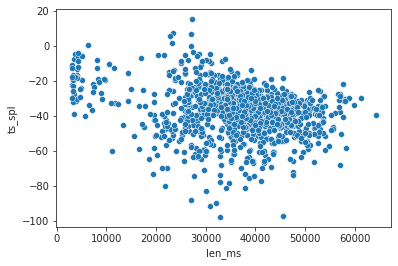

In [33]:
sns.scatterplot(data = ae_df, x = 'len_ms', y = 'ts_spl')

In [112]:
scipy.stats.pearsonr(ae_df.ts_spl, ae_df.len_ms)

PearsonRResult(statistic=-0.2556241145100066, pvalue=5.417950739901543e-17)

## try to examine variation over days

In [40]:
ae_df = ae_df.sort_values(by = 'file')

In [41]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,mf_iaaft_range_ae,mf_iaaft_range_spl,ts_ae,p_ae,sig_ae,bonf_p_ae,ts_spl,p_spl,sig_spl,bonf_p_spl
433,152,843395,847050,40482960,40658400,"[14.683919215836996, 12.046542465573031, 5.347...",2.053480,14.683919,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.36766073181501746, 0.3352950837973583, 0.29...","[0.19410361291238587, 0.20627318618658086, 0.1...",-14.154258,4.488652e-15,True,4.672687e-12,-4.437566,1.068653e-04,False,1.112468e-01
436,179,115750,118750,5556000,5700000,"[22.824395198097683, 27.58286867894334, 18.927...",2.053480,27.582869,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.23784283353020708, 0.35483812042763463, 0.3...","[0.1436079767598124, 0.16260051731018255, 0.19...",-22.400942,1.045436e-20,True,1.088299e-17,-11.083744,2.597031e-12,True,2.703509e-09
393,44,1602030,1637260,76897440,78588480,"[4.842874306314124, 16.958959993359283, 15.386...",4.193686,156.400280,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.31904794571432893, 0.353814519562473, 0.427...","[0.11717277868289688, 0.11108640472619813, 0.1...",-12.572976,1.040411e-13,True,1.083068e-10,-44.448436,1.212503e-29,True,1.262216e-26
372,23,1238880,1280705,59466240,61473840,"[57.59336342805646, 82.82025985600444, 60.1760...",4.193686,161.219653,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.35800910283779463, 0.39497396883773805, 0.3...","[0.11080628209143861, 0.12858101689397128, 0.0...",-25.162856,3.414125e-22,True,3.554104e-19,-51.242262,1.562328e-31,True,1.626384e-28
426,77,135995,161160,6527760,7735680,"[1.3235568745699353, 3.4764030774515704, 4.143...",4.648036,127.754843,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.4392064490077563, 0.4189783586692727, 0.519...","[0.11633099093389299, 0.13782066081532318, 0.1...",-34.104729,3.801116e-26,True,3.956962e-23,-48.993434,6.177692e-31,True,6.430978e-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,117,1626245,1653460,78059760,79366080,"[4.6420012779760915, 3.5578962610884433, 6.411...",8.842955,154.505897,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.4059644803425866, 0.36067721057337676, 0.45...","[0.08937598964990234, 0.11054361849605698, 0.1...",-24.834395,5.035794e-22,True,5.242261e-19,-27.938906,1.521049e-23,True,1.583412e-20
208,94,571405,604365,27427440,29009520,"[3.186041276785073, 9.179965721809026, 29.2333...",8.842955,162.128224,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.3115959289336855, 0.3354830450140819, 0.341...","[0.09283841662880787, 0.10460499408101953, 0.1...",-25.375356,2.661611e-22,True,2.770737e-19,-29.347449,3.494269e-24,True,3.637534e-21
187,73,122715,160535,5890320,7705680,"[58.48762509639229, 99.6364192335844, 81.84661...",8.842955,148.230088,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.3986918652283492, 0.4230318395431586, 0.434...","[0.14485608110147297, 0.14404394043688307, 0.1...",-38.452744,1.001554e-27,True,1.042617e-24,-81.346656,1.041896e-37,True,1.084614e-34
194,80,844145,879595,40518960,42220560,"[93.31956668172838, 103.17816015065412, 95.642...",3.635586,120.685181,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,"[0.401073566568679, 0.39489402581139244, 0.351...","[0.13620731258879193, 0.13274584278992962, 0.1...",-40.435945,2.170028e-28,True,2.258999e-25,-61.466257,5.858442e-34,True,6.098638e-31


In [42]:
ae_df['file'].values[2].split('/')

['',
 'mnt',
 'sphere',
 'speech_bci',
 'raw_data',
 's_b1555_22',
 '2022-09-20',
 'alsa',
 '08-00-01-02.wav']

In [43]:
date = []
hour = []
for filename in ae_df['file'].values:
    ## extract date
    date.append(filename.split('/')[-3])
    ## extract hour
    hour.append(filename.split('/')[-1].split('-')[0])

In [44]:
ae_df['date'] = date
ae_df['hour'] = hour

In [45]:
ae_df

,index,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,...,ts_ae,p_ae,sig_ae,bonf_p_ae,ts_spl,p_spl,sig_spl,bonf_p_spl,date,hour
433,152,843395,847050,40482960,40658400,"[14.683919215836996, 12.046542465573031, 5.347...",2.053480,14.683919,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-14.154258,4.488652e-15,True,4.672687e-12,-4.437566,1.068653e-04,False,1.112468e-01,2022-09-20,08
436,179,115750,118750,5556000,5700000,"[22.824395198097683, 27.58286867894334, 18.927...",2.053480,27.582869,False,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-22.400942,1.045436e-20,True,1.088299e-17,-11.083744,2.597031e-12,True,2.703509e-09,2022-09-20,08
393,44,1602030,1637260,76897440,78588480,"[4.842874306314124, 16.958959993359283, 15.386...",4.193686,156.400280,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-12.572976,1.040411e-13,True,1.083068e-10,-44.448436,1.212503e-29,True,1.262216e-26,2022-09-20,08
372,23,1238880,1280705,59466240,61473840,"[57.59336342805646, 82.82025985600444, 60.1760...",4.193686,161.219653,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-25.162856,3.414125e-22,True,3.554104e-19,-51.242262,1.562328e-31,True,1.626384e-28,2022-09-20,08
426,77,135995,161160,6527760,7735680,"[1.3235568745699353, 3.4764030774515704, 4.143...",4.648036,127.754843,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-34.104729,3.801116e-26,True,3.956962e-23,-48.993434,6.177692e-31,True,6.430978e-28,2022-09-20,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,117,1626245,1653460,78059760,79366080,"[4.6420012779760915, 3.5578962610884433, 6.411...",8.842955,154.505897,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-24.834395,5.035794e-22,True,5.242261e-19,-27.938906,1.521049e-23,True,1.583412e-20,2022-09-29,21
208,94,571405,604365,27427440,29009520,"[3.186041276785073, 9.179965721809026, 29.2333...",8.842955,162.128224,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-25.375356,2.661611e-22,True,2.770737e-19,-29.347449,3.494269e-24,True,3.637534e-21,2022-09-29,21
187,73,122715,160535,5890320,7705680,"[58.48762509639229, 99.6364192335844, 81.84661...",8.842955,148.230088,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-38.452744,1.001554e-27,True,1.042617e-24,-81.346656,1.041896e-37,True,1.084614e-34,2022-09-29,21
194,80,844145,879595,40518960,42220560,"[93.31956668172838, 103.17816015065412, 95.642...",3.635586,120.685181,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,...,-40.435945,2.170028e-28,True,2.258999e-25,-61.466257,5.858442e-34,True,6.098638e-31,2022-09-29,21


<AxesSubplot:xlabel='ts_spl', ylabel='Density'>

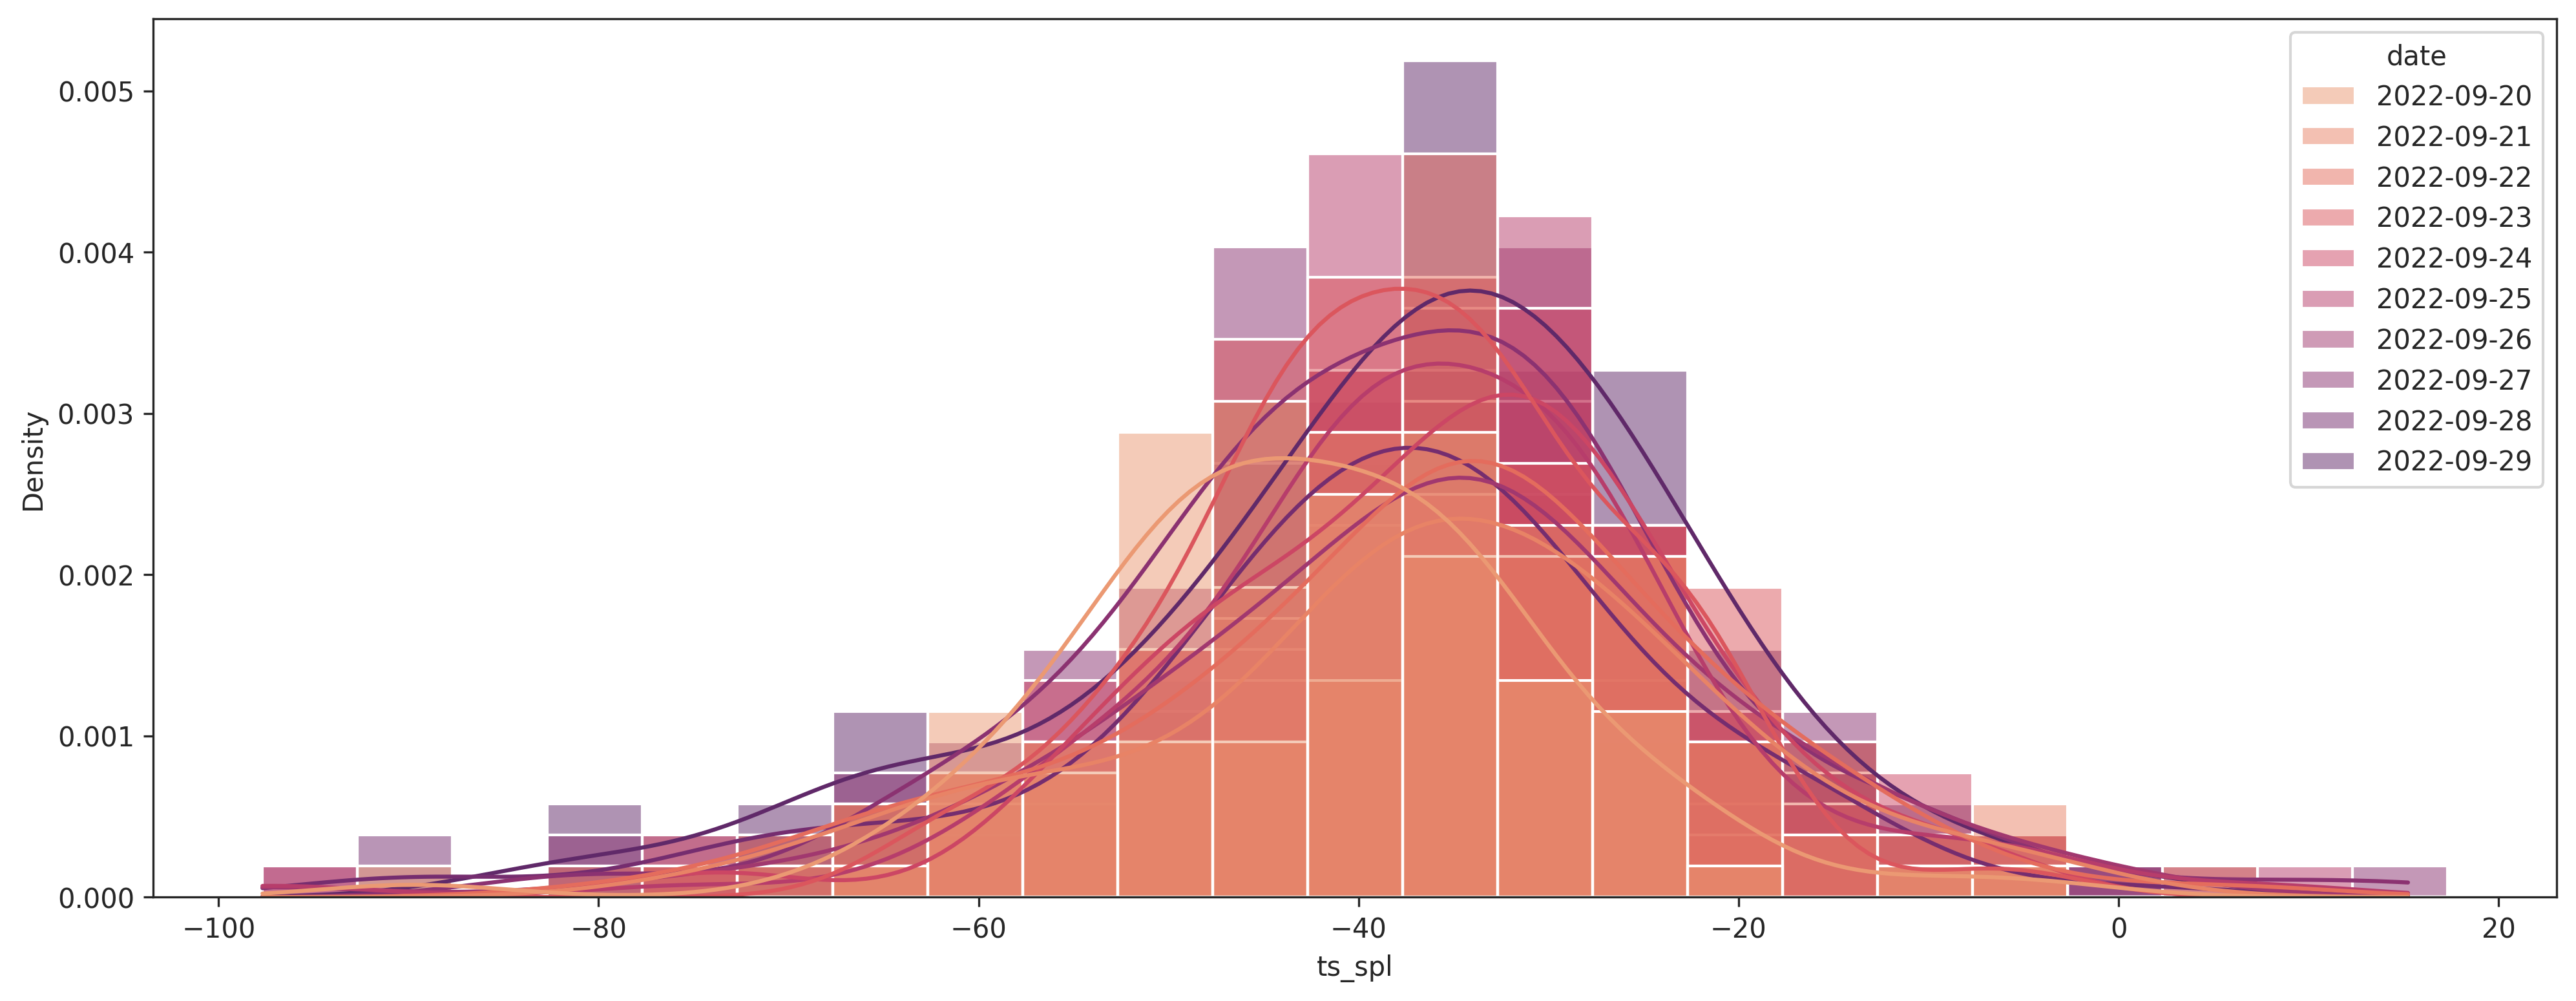

In [46]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ae_df, x = 'ts_spl', stat = 'density', hue = 'date', binwidth = 5, kde = True, palette="flare")

<AxesSubplot:xlabel='date', ylabel='ts_spl'>

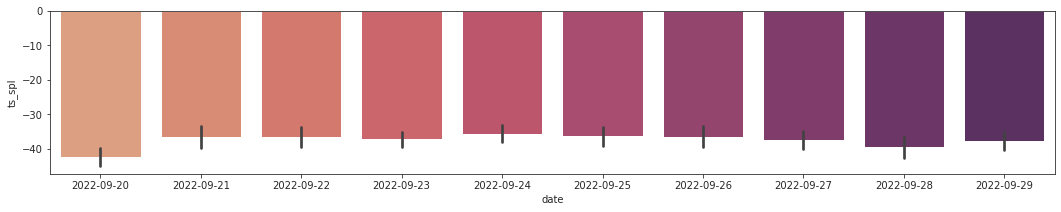

In [47]:
plt.figure(figsize = (18, 3))
sns.barplot(data = ae_df, x = 'date', y = 'ts_spl', palette="flare")

## hour?

<AxesSubplot:xlabel='ts_spl', ylabel='Density'>

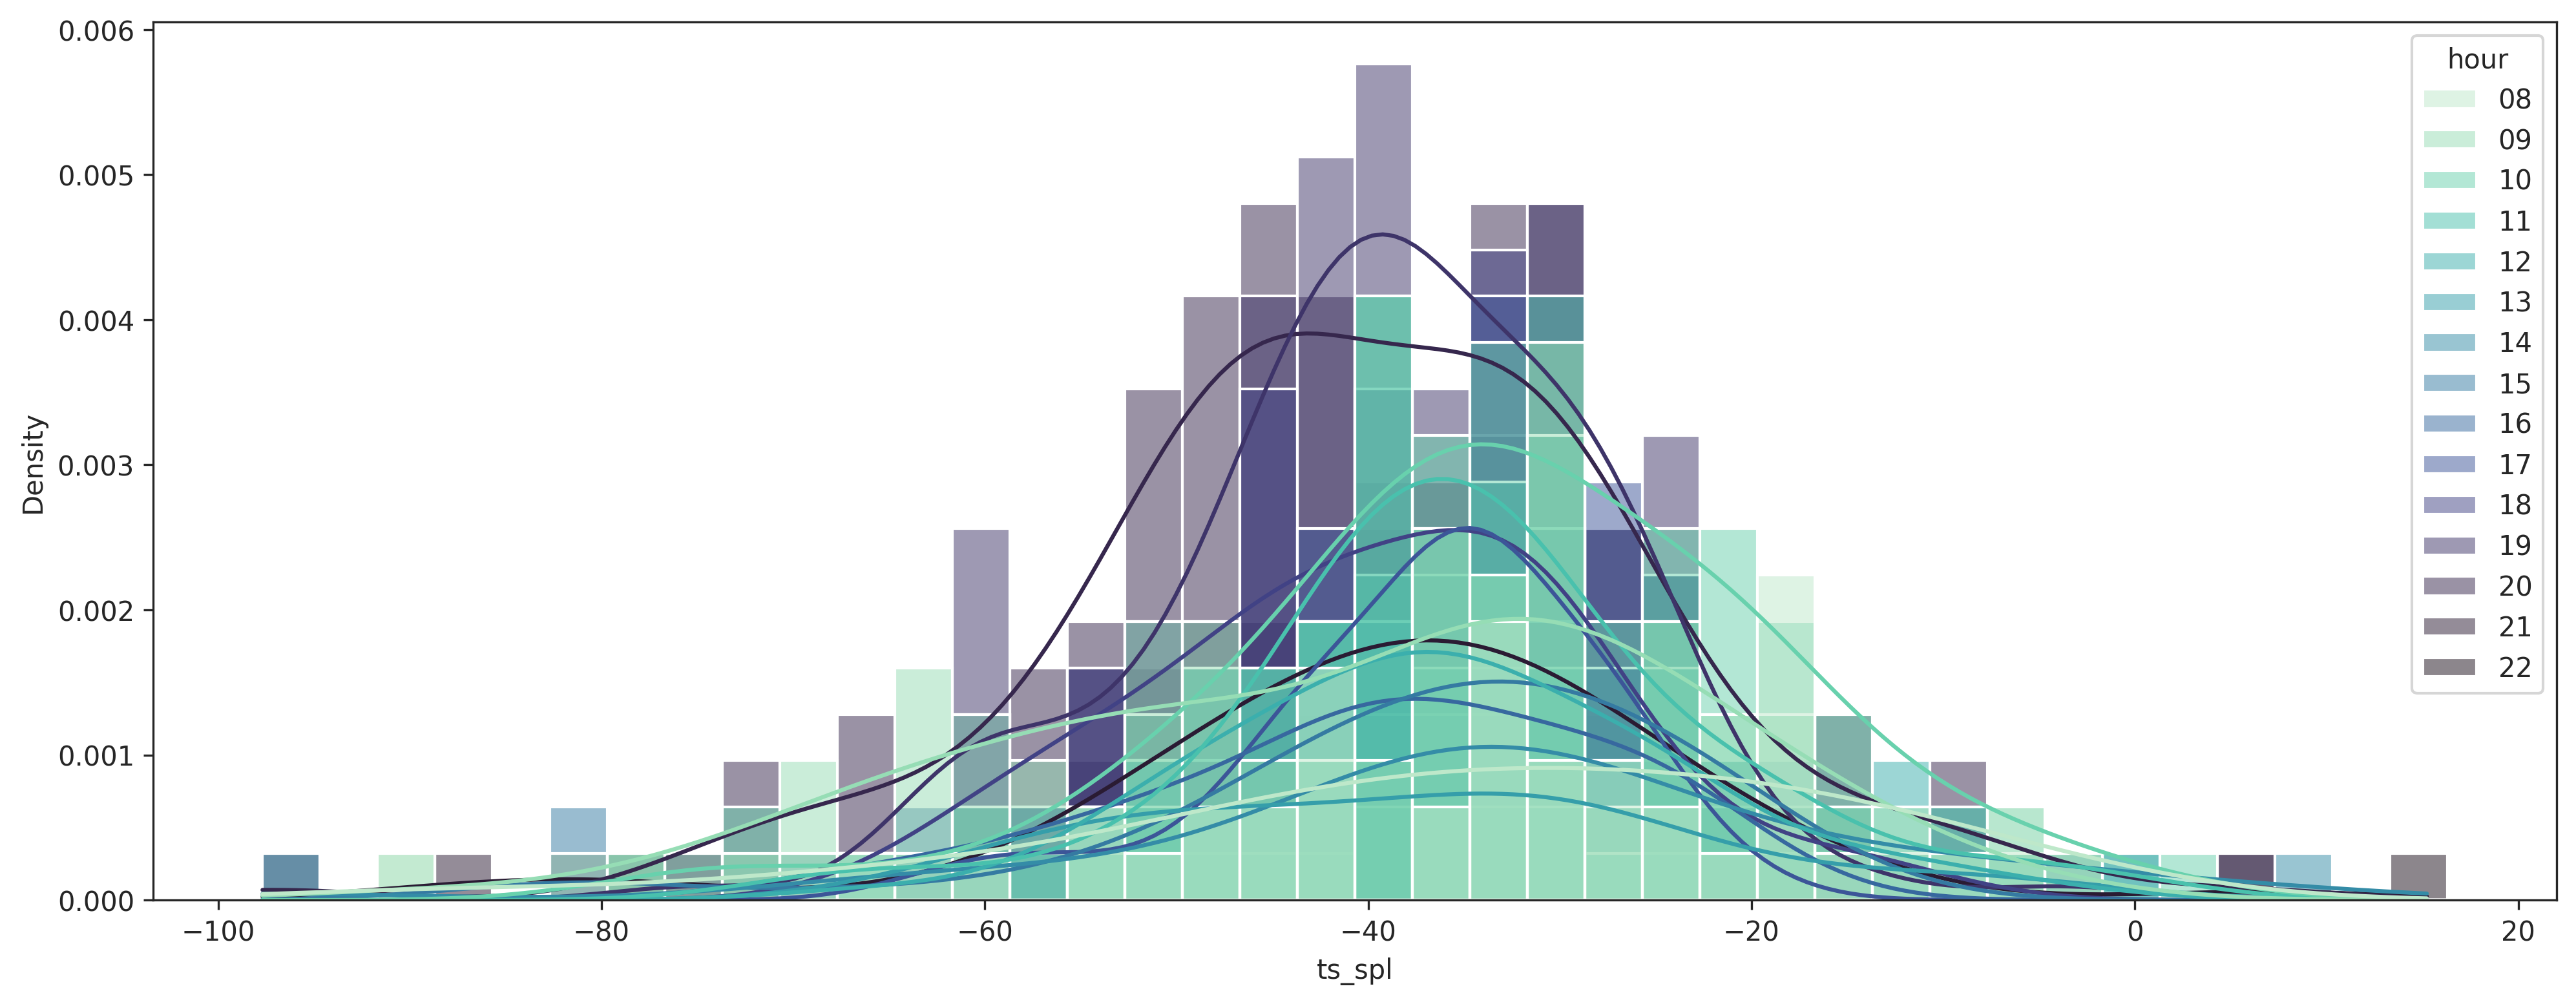

In [48]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ae_df, x = 'ts_spl', stat = 'density', hue = 'hour', binwidth = 3, kde = True, palette = 'mako_r')

<AxesSubplot:xlabel='hour', ylabel='ts_spl'>

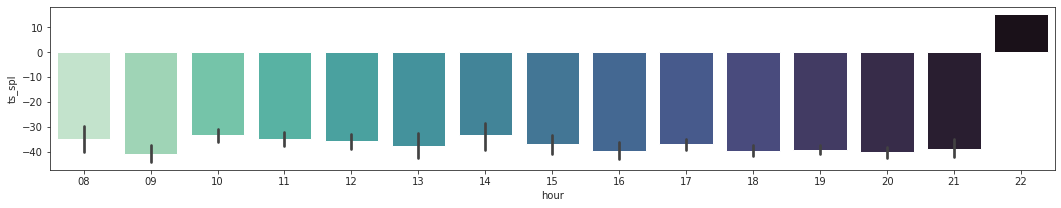

In [49]:
plt.figure(figsize = (18, 3))
sns.barplot(data = ae_df, x = 'hour', y = 'ts_spl', palette="mako_r")

In [51]:
dt = []
hr = []
hour_dist = []
for date in np.unique(ae_df['date'].values):
    for hour in np.unique(ae_df['hour'].values):
        dt.append(date)
        hr.append(hour)
        hour_dist.append(np.mean(ae_df[ae_df['date'] == date][ae_df['hour'] == hour].ts_spl))
    
hour_dist

/tmp/ipykernel_24919/2306947759.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_dist.append(np.mean(ae_df[ae_df['date'] == date][ae_df['hour'] == hour].ts_spl))


[-27.803001992919455,
 -47.740898696128575,
 -41.5384062105153,
 -39.80595217042273,
 -48.64694304394462,
 -46.112648449759895,
 -40.417946082728974,
 -44.12073739861838,
 -48.32223310147022,
 -32.5282008851,
 -38.813384947820836,
 -44.70716838306523,
 -45.4229709390844,
 -34.98039635552789,
 nan,
 nan,
 -37.83422025402245,
 -13.9737630907052,
 -36.852410136538076,
 -35.215262224883006,
 -49.53091842823853,
 -7.930620030450296,
 nan,
 nan,
 -40.566625766451736,
 -36.49278892454227,
 -38.853374642628076,
 -39.584516703178025,
 -29.998788402614537,
 nan,
 -20.4714166289831,
 -45.718508135670035,
 -39.61350824511066,
 -38.023818493369156,
 -34.439375967841514,
 -16.39536463665284,
 -12.69973621441537,
 -28.613419980025554,
 -46.00420754311935,
 -37.91035844750423,
 -40.13912495181789,
 -42.7981263609007,
 -31.83405990227308,
 -40.719993538050815,
 nan,
 -38.98951759163189,
 -36.890890514202724,
 -34.36205321723605,
 -31.998927945518687,
 -41.03568022113691,
 nan,
 -36.98251970961474,
 -32

In [52]:
df = pd.DataFrame(
    {
        "dt": dt,
        "hr": hr,
        "hour_dist": hour_dist
    }
)

In [53]:
df

,dt,hr,hour_dist
0,2022-09-20,08,-27.803002
1,2022-09-20,09,-47.740899
2,2022-09-20,10,-41.538406
3,2022-09-20,11,-39.805952
4,2022-09-20,12,-48.646943
...,...,...,...
145,2022-09-29,18,-43.064753
146,2022-09-29,19,-39.302816
147,2022-09-29,20,-38.685438
148,2022-09-29,21,-41.566168


<AxesSubplot:xlabel='hr', ylabel='hour_dist'>

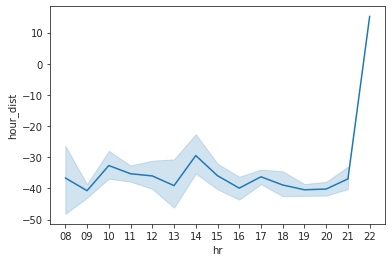

In [54]:
sns.lineplot(data = df, x = 'hr', y = 'hour_dist', palette="flare")

<AxesSubplot:xlabel='hr', ylabel='hour_dist'>

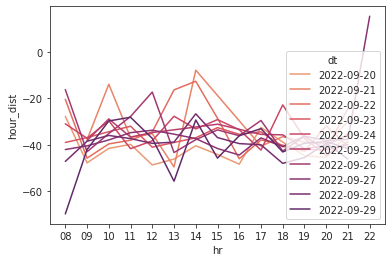

In [55]:
sns.lineplot(data = df, x = 'hr', y = 'hour_dist', hue = 'dt', palette="flare")